In [35]:
# Importing Dataset
from sklearn.datasets import fetch_olivetti_faces
import numpy as np

# Download Olivetti faces dataset
olivetti = fetch_olivetti_faces()
x = olivetti.images
y = olivetti.target

# Print info on shapes and reshape where necessary
print("Original x shape:", x.shape)
X = x.reshape((400, 4096))
print("New x shape:", X.shape)
print("y shape", y.shape)

Original x shape: (400, 64, 64)
New x shape: (400, 4096)
y shape (400,)


In [36]:
#Verification of Above output
print("There are {} images in the dataset".format(len(x)))
print("There are {} unique targets in the dataset".format(len(np.unique(y))))
print("Size of each image is {}x{}".format(x.shape[1],x.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(x[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [37]:
import pandas as pd
index_values = []
col_values = []
for i in range(0,400):
    index_values.append(i+1)

for i in range(0,4096):
    col_values.append(i+1)

df = pd.DataFrame(data = X, index = index_values, columns = col_values)

In [38]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.400134,0.434236,0.476281,0.518481,0.554845,0.588729,0.621426,0.647510,0.664814,0.676591,...,0.363079,0.367221,0.363027,0.355506,0.340196,0.338657,0.335909,0.321415,0.313647,0.310455
std,0.180695,0.189504,0.194742,0.193313,0.188593,0.178481,0.167109,0.155024,0.147616,0.143583,...,0.164952,0.181861,0.181611,0.188709,0.186088,0.189256,0.195280,0.187842,0.183616,0.180635
min,0.086777,0.066116,0.090909,0.041322,0.107438,0.107438,0.115702,0.115702,0.119835,0.140496,...,0.049587,0.037190,0.053719,0.049587,0.033058,0.012397,0.049587,0.057851,0.061983,0.033058
25%,0.243802,0.267562,0.314050,0.383264,0.446281,0.515496,0.544421,0.581612,0.599174,0.611570,...,0.227273,0.214876,0.219008,0.197314,0.177686,0.177686,0.173554,0.173554,0.173554,0.172521
50%,0.392562,0.458678,0.512397,0.545455,0.584711,0.615702,0.652893,0.669421,0.683884,0.702479,...,0.367769,0.367769,0.342975,0.334711,0.320248,0.314050,0.299587,0.289256,0.270661,0.272727
75%,0.528926,0.575413,0.636364,0.666322,0.702479,0.714876,0.735537,0.757231,0.772727,0.780992,...,0.484504,0.496901,0.500000,0.500000,0.479339,0.462810,0.462810,0.446281,0.414256,0.417355
max,0.805785,0.822314,0.871901,0.892562,0.871901,0.871901,0.871901,0.871901,0.871901,0.871901,...,0.793388,0.904959,0.888430,0.896694,0.826446,0.863636,0.921488,0.929752,0.884298,0.822314


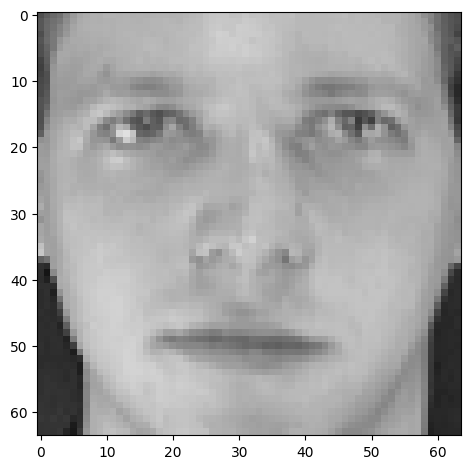

In [39]:
from skimage.io import imshow
loadImage = x[0]
imshow(loadImage)

In [40]:
print("unique target (y) number:",np.unique(y))

unique target (y) number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [41]:
from sklearn.decomposition import PCA
n_comp = 100
pca = PCA(n_components=n_comp, whiten=True).fit(X)
x_train_pca = pca.transform(X)
x_test_pca = pca.transform(X)

Text(0.5, 0.98, 'All Eigen Faces')

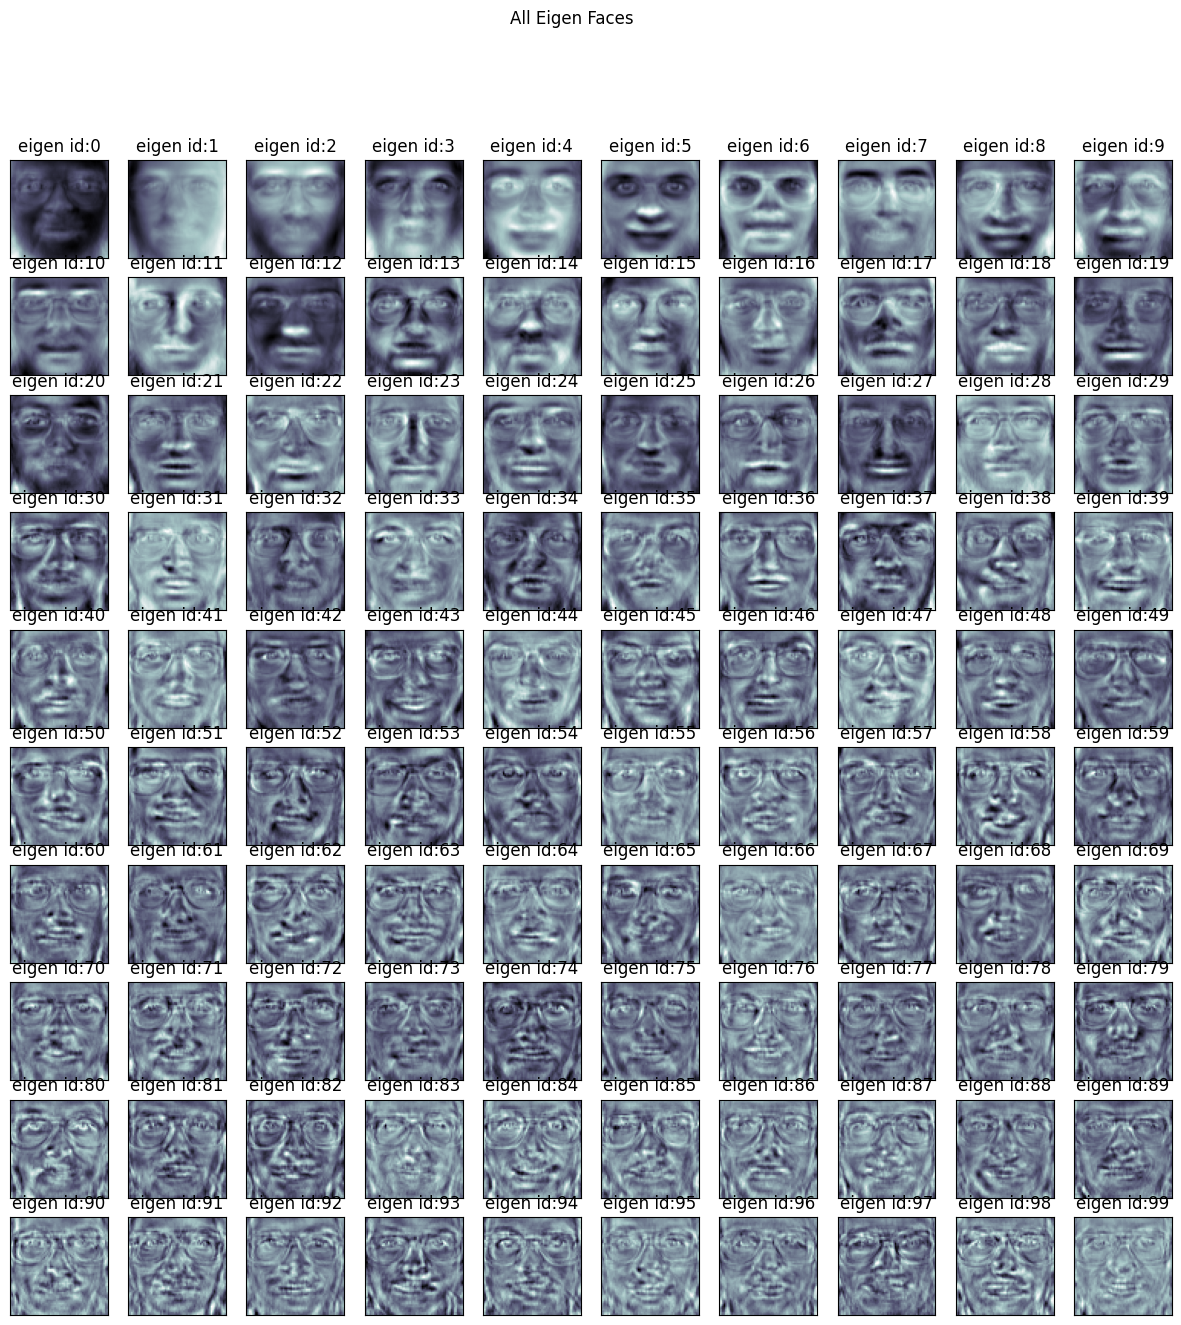

In [ ]:
import matplotlib.pyplot as plt
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, x.shape[1], x.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="bone")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [ ]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()

    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

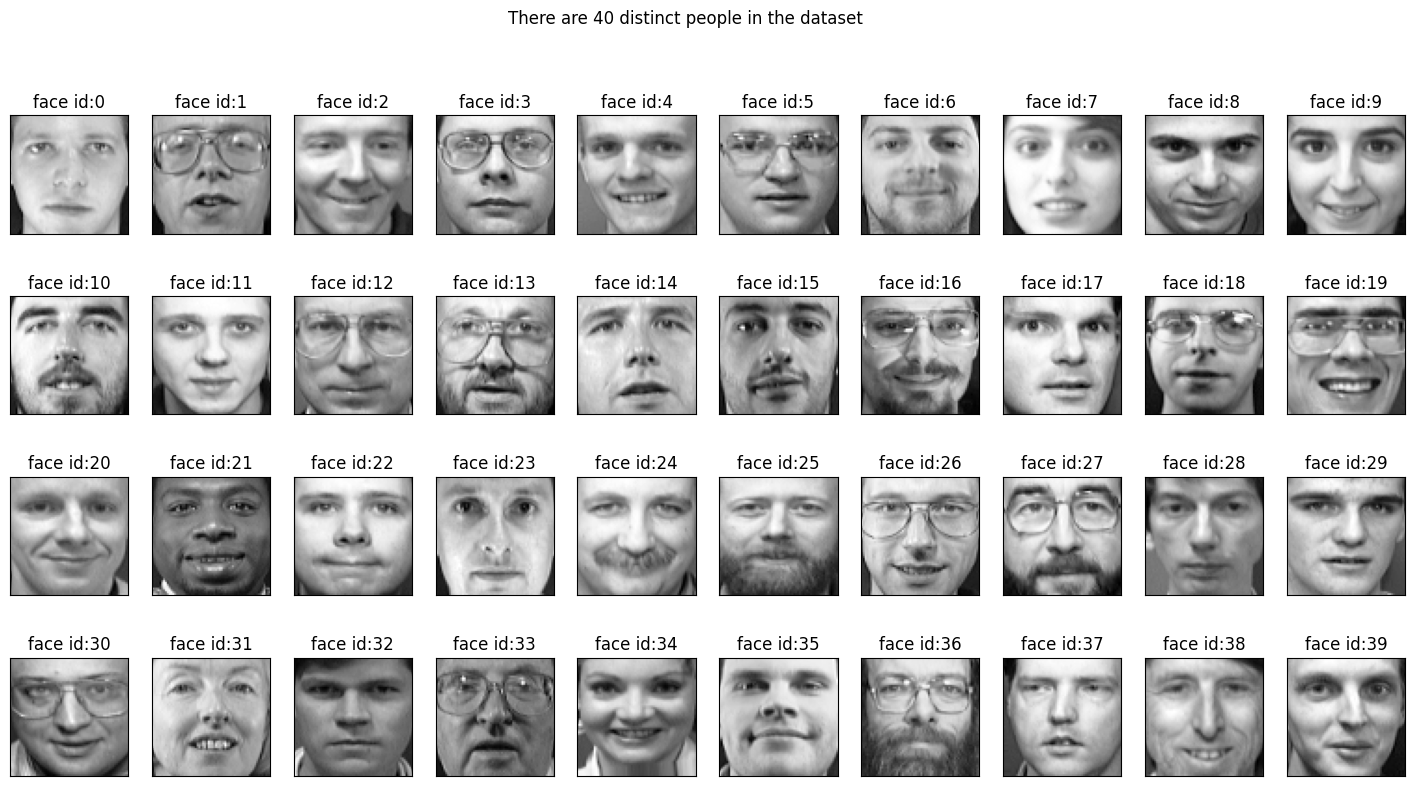

In [ ]:
show_40_distinct_people(x, np.unique(y))

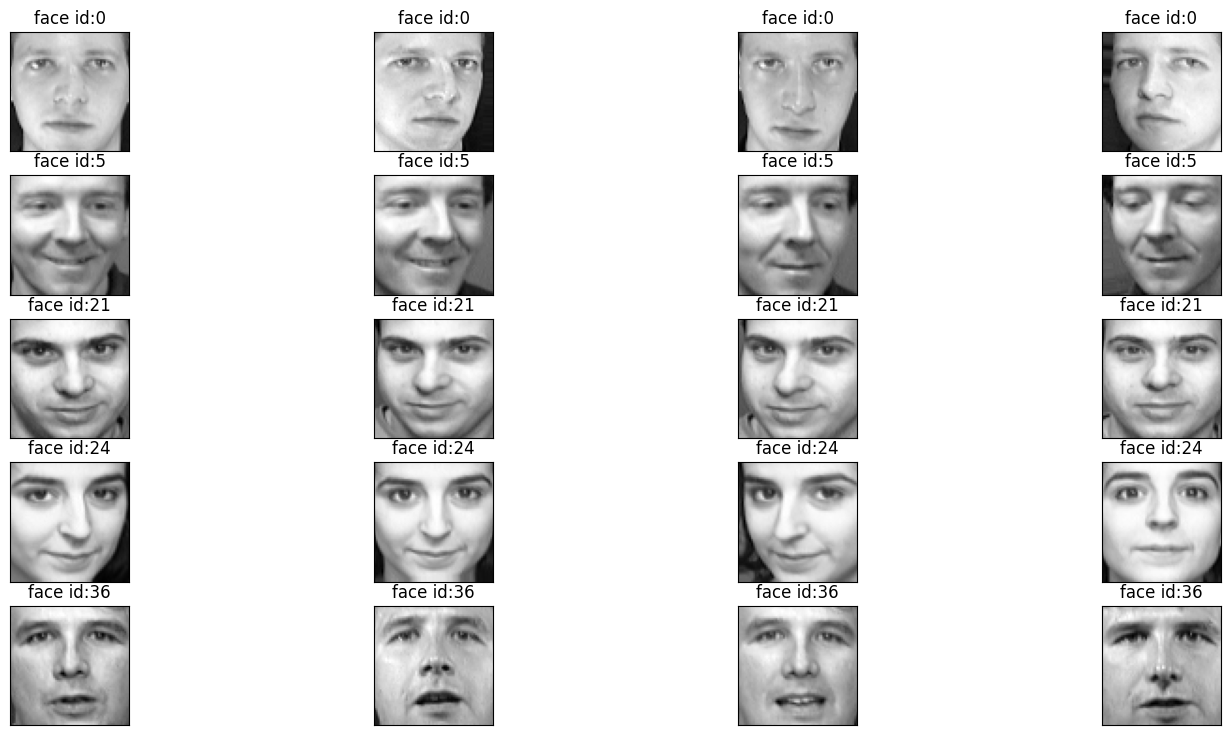

In [ ]:
def show_4_faces_of_n_subject(images, subject_ids):
    cols=4# each subject has 4 distinct face images
    rows=(len(subject_ids)*4)/cols #
    rows=int(rows)

    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()

    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*4 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

#You can playaround subject_ids to see other people faces
show_4_faces_of_n_subject(images=x, subject_ids=[0,5, 21, 24, 36])

ML

TESTING AND TRAINING of dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
#Split data for train and test purposes

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=46)

In [ ]:
print("X: ", x.shape)
print("Y: ", y.shape)

X:  (400, 64, 64)
Y:  (400,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=46)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (280, 4096)
x_test:  (120, 4096)
y_train:  (280,)
y_test:  (120,)


In [ ]:
list1 = []
accuracylist = []

RF

In [ ]:
rf = RandomForestClassifier(n_estimators = 400, random_state = 1)
rf.fit(x_train, y_train)
RF_accuracy = round(rf.score(x_test, y_test)*100,2)

y_pred = rf.predict(x_test)
print("RF_accuracy is %", RF_accuracy)
list1.append("Random Forest")
accuracylist.append(RF_accuracy)

In [ ]:
num_correct = np.sum(y_test == y_pred)
print(f"Number of correctly classified samples: {num_correct}")
num_incorrect = len(y_test) - num_correct
print(f"Number of incorrectly classified samples: {num_incorrect}")

In [ ]:
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
print(metrics.classification_report(y_test, y_pred))

SVM

In [ ]:
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(x_train, y_train)
svm_accuracy = round(svm.score(x_test,y_test)*100,2)
y_pred = svm.predict(x_test)
print("SVM_accuracy is %",svm_accuracy)
list1.append("SVM")
accuracylist.append(svm_accuracy)

In [ ]:
num_correct = np.sum(y_test == y_pred)
print(f"Number of correctly classified samples: {num_correct}")
num_incorrect = len(y_test) - num_correct
print(f"Number of incorrectly classified samples: {num_incorrect}")

In [ ]:
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
print(metrics.classification_report(y_test, y_pred))

LR

In [ ]:
lr = LogisticRegression(max_iter=5)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
LR_accuracy = round(lr.score(x_test, y_test)*100,2)

print("LR_accuracy is %", LR_accuracy)

list1.append("Logistic Regression")
accuracylist.append(LR_accuracy)

In [ ]:
num_correct = np.sum(y_test == y_pred)
print(f"Number of correctly classified samples: {num_correct}")
num_incorrect = len(y_test) - num_correct
print(f"Number of incorrectly classified samples: {num_incorrect}")

In [ ]:
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
print(metrics.classification_report(y_test, y_pred))

NB

In [ ]:
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_accuracy = round(nb.score(x_test,y_test)*100,2)
y_pred = nb.predict(x_test)
print("Naive_Bayes_accuracy is %",nb_accuracy)
list1.append("Naive_Bayes")
accuracylist.append(nb_accuracy)

In [ ]:
num_correct = np.sum(y_test == y_pred)
print(f"Number of correctly classified samples: {num_correct}")
num_incorrect = len(y_test) - num_correct
print(f"Number of incorrectly classified samples: {num_incorrect}")

In [ ]:
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
print(metrics.classification_report(y_test, y_pred))

In [ ]:
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
print(metrics.classification_report(y_test, y_pred))

In [ ]:
df = pd.DataFrame({'METHOD': list1, 'ACCURACY (%)': accuracylist})
df = df.sort_values(by=['ACCURACY (%)'])
df = df.reset_index(drop=True)
df.head()